Libraries








In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

Import Data

In [2]:
data = pd.read_csv('/content/Software houses PK .csv')

Reading Data

In [3]:
data

,Company Name,City,Address,Contact No,Services
0,BIZNET SOLUTIONS,Karachi,"Suite #411, Anum Blessing, Block-78, K.C.H.S.,...","03008227997, 02134325151","website design development, digital media mark..."
1,Download Payroll Software,Dera Bugti,"Patel Nagar, Delhi, 110011 Dera Bugti, Balochi...","09868337762, 09868337762",-
2,Cherry Berry UCM,Lahore,"Offices 208, 314 - Siddiq Trade Center Main Bo...",924235781943,-
3,Speecto,Faisalabad,"188 D Ground, Block D People's Colony No 1, Fa...",(041)6074905,-
4,AI Development Company,Lahore,"Plot 15, Civic Centre Block D 2 Phase 1 Johar ...",92 313 4110464,-
...,...,...,...,...,...
694,Invictus solutions Pvt Ltd,Faisalabad,"101 Regency Arcade, The, Mall Road",(041) 2408084,Software company
695,Relax Solutions Pvt Ltd,Faisalabad,"Head Office: Office# 2, Floor# 7, Ashraf Butt ...",NaN,IT Services and IT Consulting
696,Xelent solutions,Faisalabad,"P-58 Usman Colony, Main Sargodha Road",(0322)0008788,"Software Development, Web Development Services..."
697,fillinx solutions,Faisalabad,"Flloor No. 6, Burj Ul Kuwait Plaza, Kohinoor City",0319 0221212,Software Development


In [4]:
data.shape

(699, 5)

In [5]:
data.isnull().sum() #checking for total null values

Company Name     0
City             1
Address          5
Contact No      67
Services        44
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  699 non-null    object
 1   City          698 non-null    object
 2   Address       694 non-null    object
 3   Contact No    632 non-null    object
 4   Services      655 non-null    object
dtypes: object(5)
memory usage: 27.4+ KB


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
print(data.describe)
data.describe()

<bound method NDFrame.describe of                    Company Name        City  \
0              BIZNET SOLUTIONS     Karachi   
1     Download Payroll Software  Dera Bugti   
2              Cherry Berry UCM      Lahore   
3                       Speecto  Faisalabad   
4        AI Development Company      Lahore   
..                          ...         ...   
694  Invictus solutions Pvt Ltd  Faisalabad   
695     Relax Solutions Pvt Ltd  Faisalabad   
696            Xelent solutions  Faisalabad   
697           fillinx solutions  Faisalabad   
698         TechloSet Solutions  Faisalabad   

                                               Address  \
0    Suite #411, Anum Blessing, Block-78, K.C.H.S.,...   
1    Patel Nagar, Delhi, 110011 Dera Bugti, Balochi...   
2    Offices 208, 314 - Siddiq Trade Center Main Bo...   
3    188 D Ground, Block D People's Colony No 1, Fa...   
4    Plot 15, Civic Centre Block D 2 Phase 1 Johar ...   
..                                                 ..

,Company Name,City,Address,Contact No,Services
count,699,698,694,632,655
unique,679,19,668,588,420
top,Brain-Logix,Islamabad,Not Available,Not Available,Software Houses
freq,2,225,7,12,71


Exploratory Data Analysis (EDA)

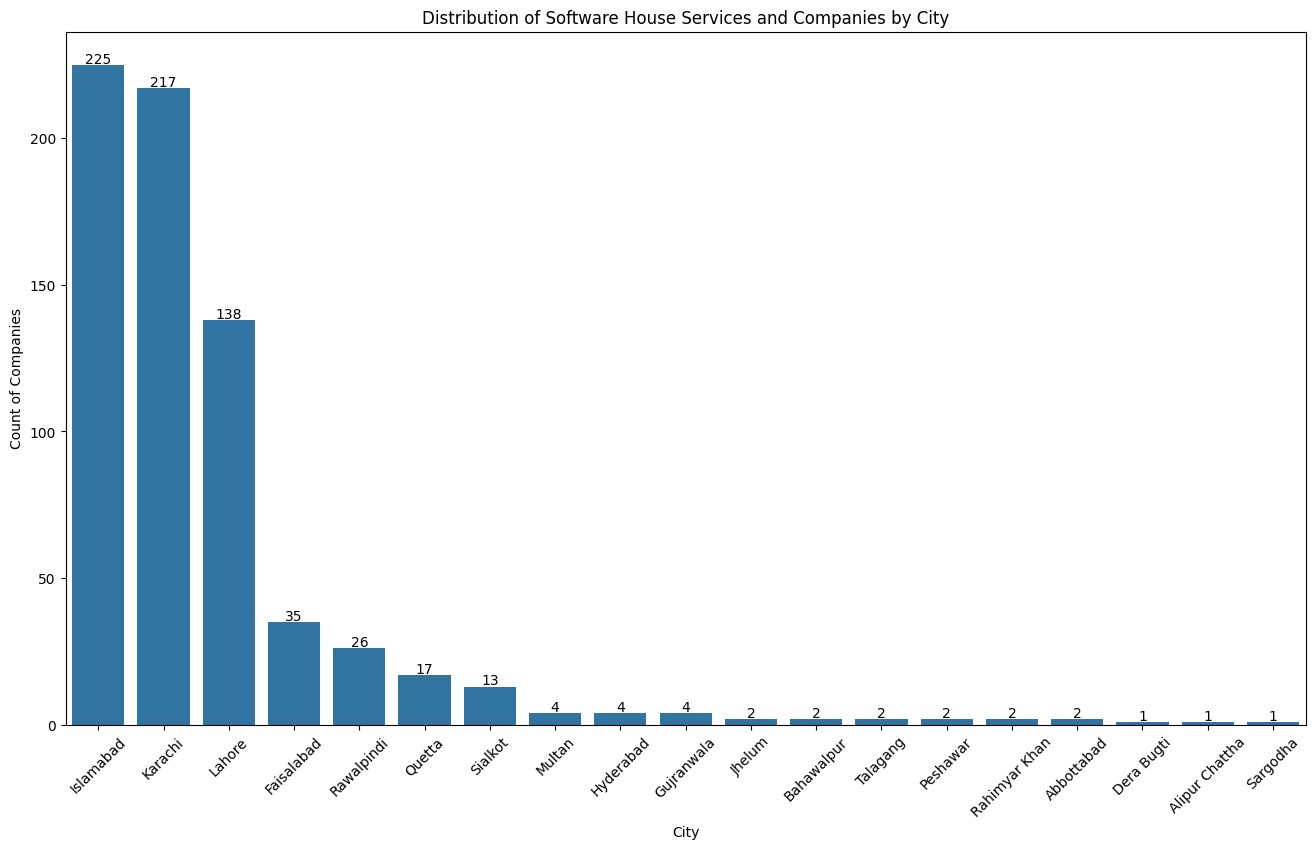

In [9]:
plt.figure(figsize=(16, 9))
plt.title('Distribution of Software House Services and Companies by City')
ax = sns.countplot(data=data, x='City', order=data['City'].value_counts().index)
plt.xlabel('City')
plt.ylabel('Count of Companies')
plt.xticks(rotation=45)

# Calculate count of companies in each city
company_counts_by_city = data['City'].value_counts()

# Add count of software companies on top of each bar
for city, count in company_counts_by_city.items():
    ax.annotate(f'\n{count}', (list(company_counts_by_city.index).index(city), count), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

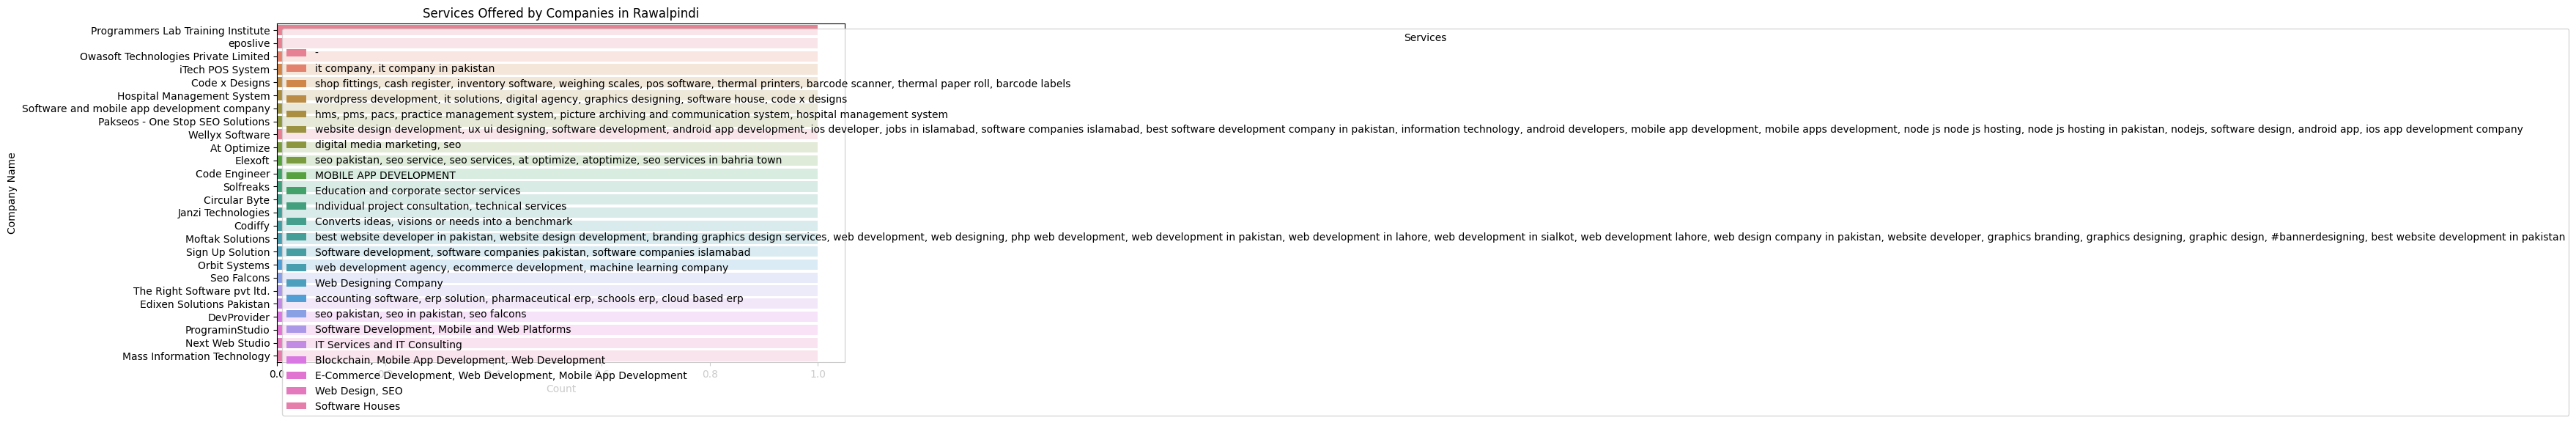

In [13]:

# Filter the data for the city of Rawalpindi
rawalpindi_data = data[data['City'] == 'Rawalpindi']

# Plot the company names and their services
plt.figure(figsize=(10, 6))
sns.countplot(data=rawalpindi_data, y='Company Name', hue='Services')
plt.title('Services Offered by Companies in Rawalpindi')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.legend(title='Services')
plt.show()

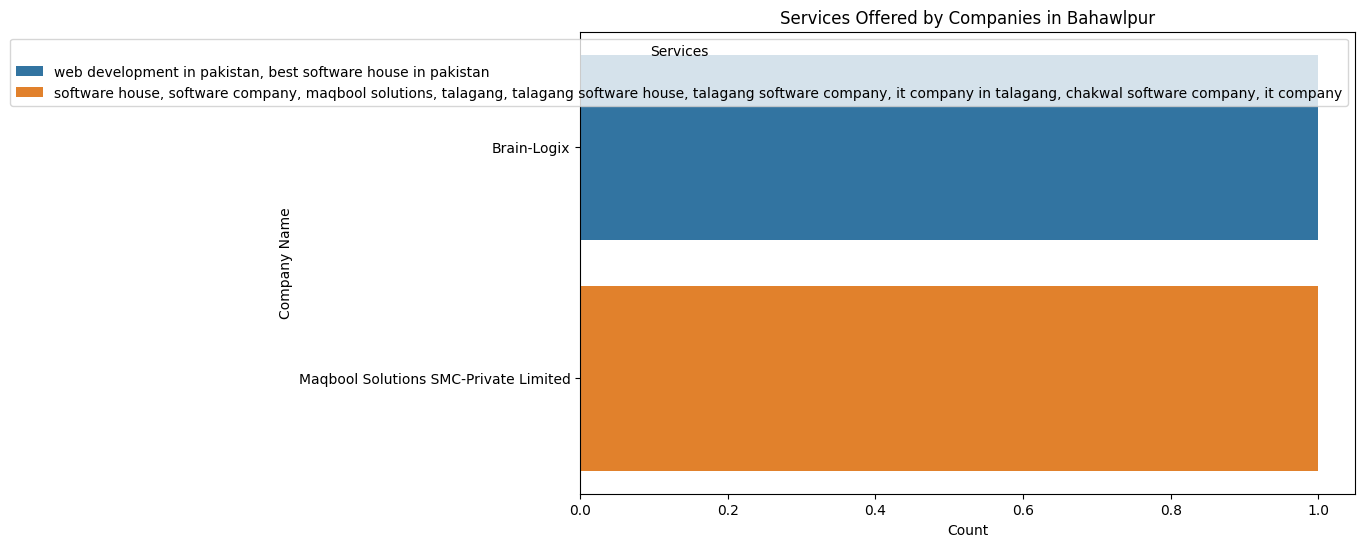

In [11]:
# Filter the data for the city of Rawalpindi
rawalpindi_data = data[data['City'] == 'Talagang']

# Plot the company names and their services
plt.figure(figsize=(10, 6))
sns.countplot(data=rawalpindi_data, y='Company Name', hue='Services')
plt.title('Services Offered by Companies in Bahawlpur')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.legend(title='Services')
plt.show()

Machine Learning

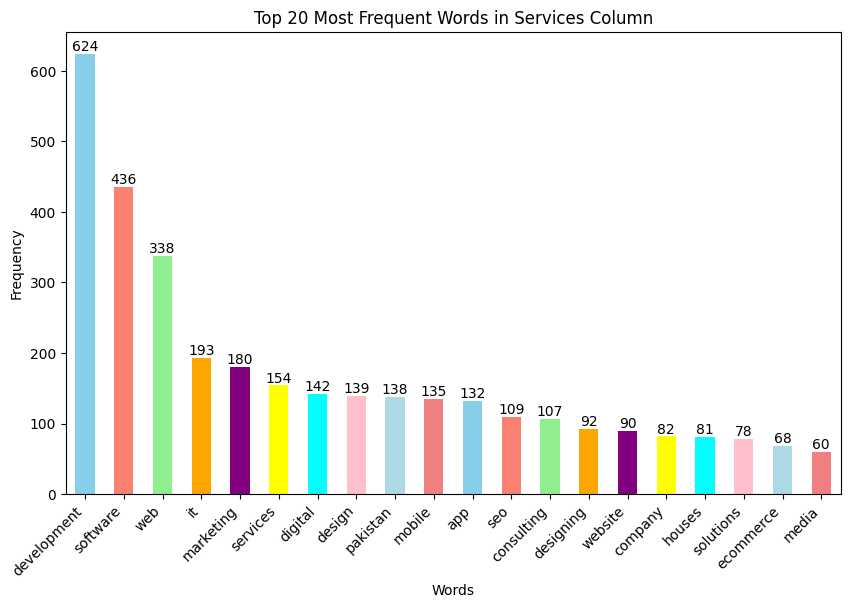

In [14]:

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove specified words
    specified_words = ['and', 'in']
    text = ' '.join(word for word in text.split() if word not in specified_words)
    return text

# Concatenate all services into a single string and preprocess it
# Convert all entries in 'Services' column to strings
all_services = ' '.join(str(service) for service in data['Services'] if not pd.isnull(service))
all_services = preprocess_text(all_services)

# Create a word frequency count
word_counts = pd.Series(all_services.split()).value_counts()

# Plotting the top N frequent words
top_n = 20  # Change this value to visualize more or fewer words
top_words = word_counts.head(top_n)

# Defining colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'cyan', 'pink', 'lightblue', 'lightcoral']

# Plotting the bar plot with colors
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color=colors)
plt.title(f'Top {top_n} Most Frequent Words in Services Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
for i, count in enumerate(top_words):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

